# Classifying images with pretrained CNNs

[VGG-16](https://neurohive.io/en/popular-networks/vgg16/) is a convolutional neural network proposed by K. Simonyan and A. Zisserman of the University of Oxford in the paper [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). The model achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1,000 classes. VGG-16 required weeks of training using NVIDIA Titan GPUs and is freely available to researchers. It is also one of several pretrained CNNs available with Keras.

In this exercise, we load the VGG-16 network and initialize it with the ImageNet weights. Then we ask it to classify an image and show some of the feature maps generated by the network's convolutional layers. Finally, we load a version of Microsoft's award-winning [ResNet](https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8) CNN and ask it to classify the same image.

![](Images/vgg-16.png)

# Load VGG-16 and classify an image

Loading VGG-16 and initializing it with imageNet weights requires just one line of code in Keras. Let's load the network and ask it to classify an image.

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Load the image, which depicts an Arctic fox.

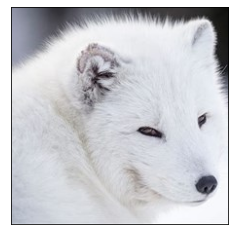

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image

x = image.load_img('Data/samples/arctic_fox/arctic_fox_140.jpeg', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the image using the VGG-16 version of `preprocess_input` and submit it to the network for classification.

In [3]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = model.predict(x)
decode_predictions(y)

[[('n02120079', 'Arctic_fox', 0.9958307),
  ('n02114548', 'white_wolf', 0.004137663),
  ('n02114367', 'timber_wolf', 1.6531681e-05),
  ('n02109961', 'Eskimo_dog', 5.43057e-06),
  ('n02441942', 'weasel', 2.1879637e-06)]]

VGG-16 correctly identifies the image as one containing an Arctic fox. It's able to do so because "Arctic_fox" is one of the ImageNet classes that the network was trained on.

## View feature maps generated by the CNN

We can visualize what the network's convolutional layers are doing by running an image through the network and using Matplotlib to plot the feature maps that it generates. We'll start by displaying the first 32 (of 64) feature maps generated in the `block1_conv1` layer.

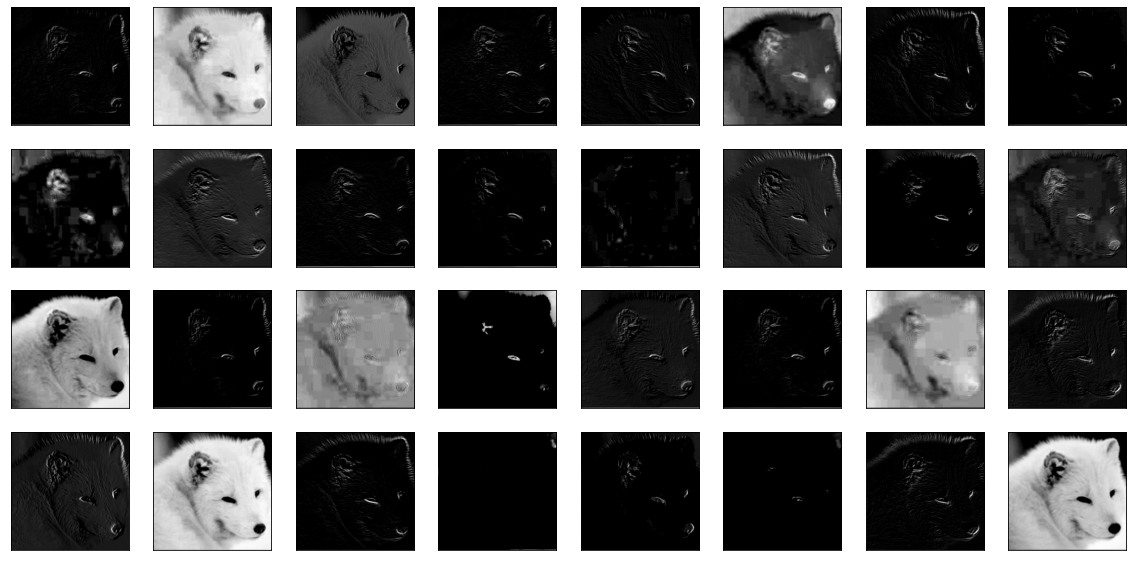

In [4]:
from keras import Model

def show_features(features):
    fig, axes = plt.subplots(4, 8, figsize=(20, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(features[0, :, :, i], cmap='gray')
        
partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
features = partial_model.predict(x)
show_features(features)

Next, show the first 32 (of 128) feature maps generated in the `block2_conv1` layer.

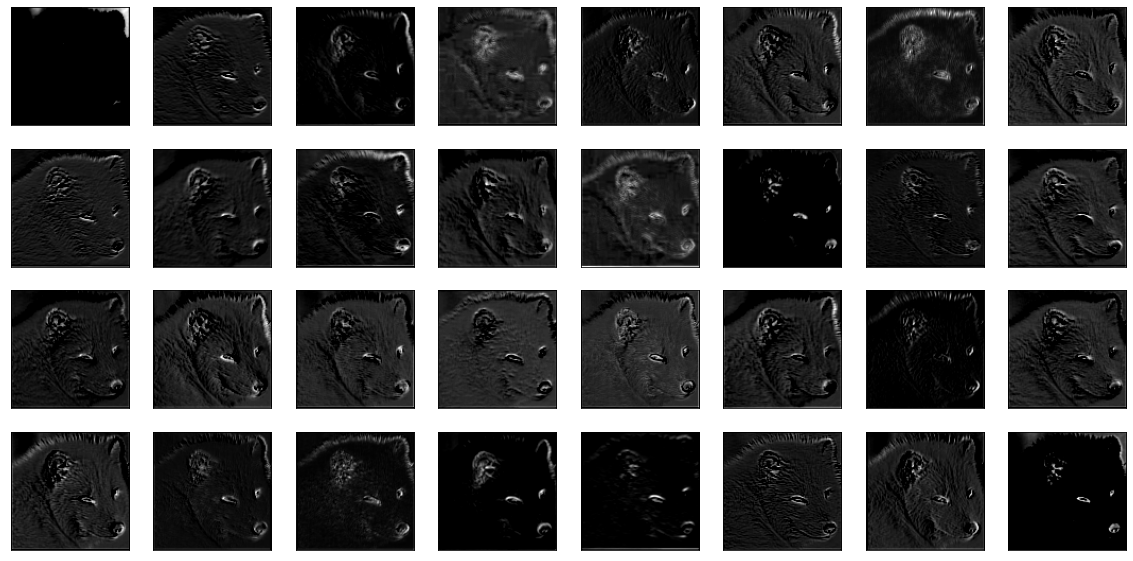

In [5]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[4].output)
features = partial_model.predict(x)
show_features(features)

Show the first 32 (of 256) feature maps generated in the `block3_conv1` layer.

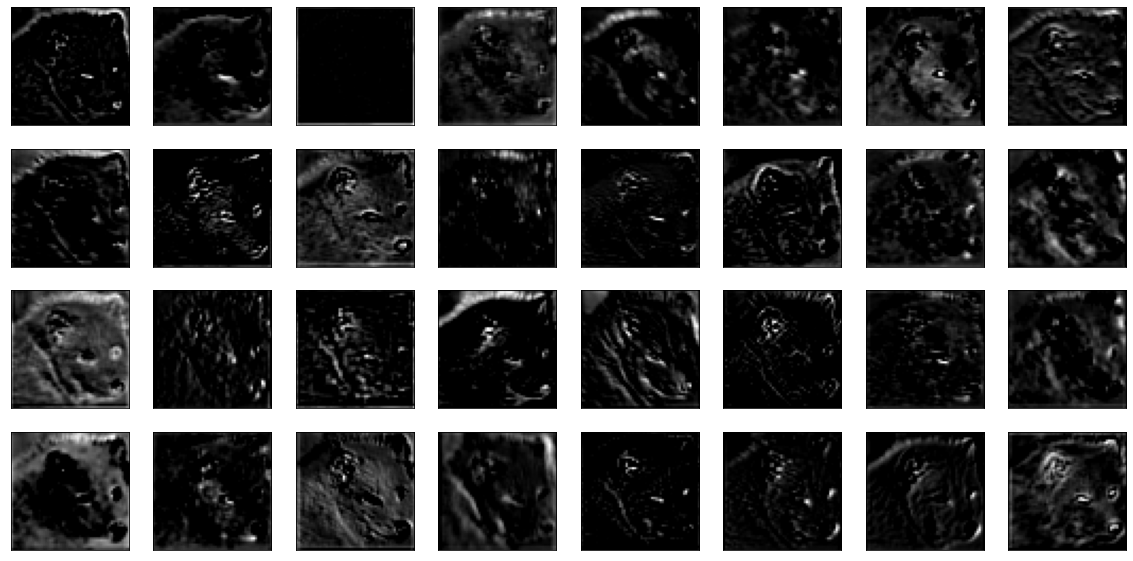

In [6]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[7].output)
features = partial_model.predict(x)
show_features(features)

Show the first 32 (of 512) feature maps generated in the `block4_conv1` layer.

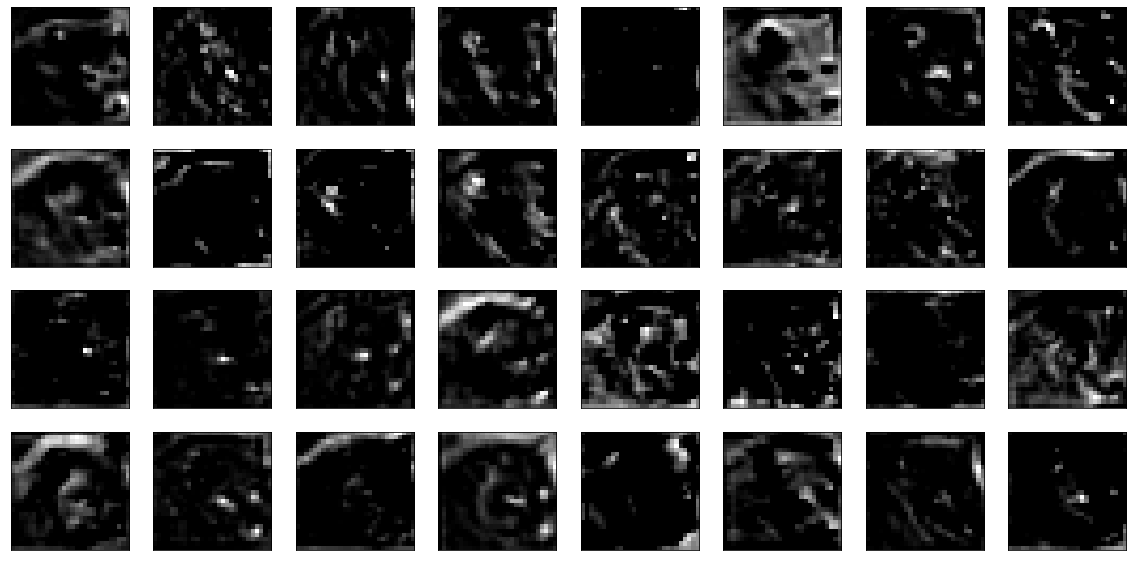

In [7]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[11].output)
features = partial_model.predict(x)
show_features(features)

Finally, show the first 32 (of 512) feature maps generated in the `block5_conv1` layer.

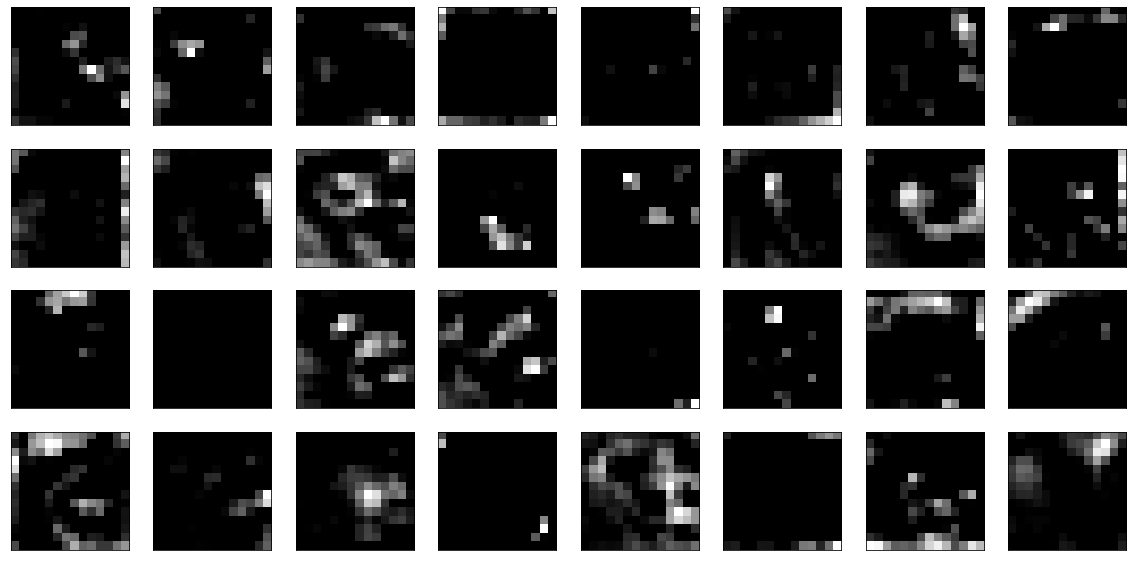

In [8]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[15].output)
features = partial_model.predict(x)
show_features(features)

## Use RestNet-50V2 to classify an image

ResNet-50V2 is a more sophisticated CNN built and trained on the ImageNet dataset by Microsoft. Let's use it to classify the same image and see how it responds. Start by loading the network and initializing it with the ImageNet weights.

In [9]:
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights='imagenet')
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

Now load the image.

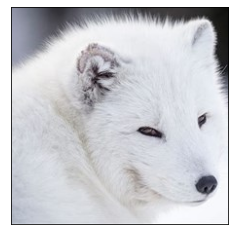

In [10]:
x = image.load_img('Data/samples/arctic_fox/arctic_fox_140.jpeg', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the pixels in the image using the ResNet-50V2 version of `preprocess_input` and submit the image to the network for classification. Note that ResNet CNNs require pixel values to be divided by 255 after preprocessing.

In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

[[('n02120079', 'Arctic_fox', 0.9999944),
  ('n02114548', 'white_wolf', 4.760021e-06),
  ('n02119789', 'kit_fox', 2.3306782e-07),
  ('n02442845', 'mink', 1.2460312e-07),
  ('n02111889', 'Samoyed', 1.1914468e-07)]]

ResNet-50V2 also identifies the image as an Arctic fox, with slightly more certainty than VGG-16. How would it respond to a walrus image?

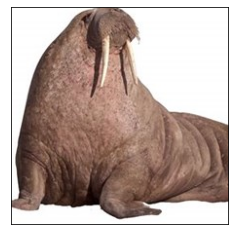

In [12]:
x = image.load_img('Data/samples/walrus/walrus_143.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [13]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

[[('n02454379', 'armadillo', 0.6375817),
  ('n01704323', 'triceratops', 0.16057007),
  ('n02113978', 'Mexican_hairless', 0.077950805),
  ('n02398521', 'hippopotamus', 0.022283986),
  ('n01817953', 'African_grey', 0.01694413)]]

ResNet-50V2 doesn't recognize the walrus in the image. What does this imply about how the network was trained?